In [1]:
import matplotlib.pyplot as plt #import the matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans #library for K-Means Clustering
from sklearn import datasets

In [2]:
!pip install mlxtend

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

## Problem a

In [4]:
# import pandas
import pandas as pd

# read in vehicle data
data1 = pd.read_csv('data/imports-85-01.csv')

# print out data
data1

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,168.8,64.1,48.8,111,21,27,13495
1,alfa-romero,gas,168.8,64.1,48.8,111,21,27,16500
2,alfa-romero,gas,171.2,65.5,52.4,154,19,26,?
3,audi,gas,176.6,66.2,54.3,102,24,30,?
4,audi,gas,176.6,66.4,54.3,115,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114,23,28,16845
201,volvo,gas,188.8,68.8,55.5,160,19,25,19045
202,volvo,gas,188.8,68.9,55.5,134,18,23,21485
203,volvo,diesel,188.8,68.9,55.5,106,26,27,22470


In [5]:
missing_values = ["?"]
data1 = pd.read_csv("data/imports-85-01.csv", na_values = missing_values)

In [6]:
data2=data1.dropna()
data2

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.0
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.0
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.0
5,audi,gas,177.3,66.3,53.1,110.0,19,25,15250.0
6,audi,gas,192.7,71.4,55.7,110.0,19,25,17710.0
...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114.0,23,28,16845.0
201,volvo,gas,188.8,68.8,55.5,160.0,19,25,19045.0
202,volvo,gas,188.8,68.9,55.5,134.0,18,23,21485.0
203,volvo,diesel,188.8,68.9,55.5,106.0,26,27,22470.0


In [7]:
# select feature columns (every column except for the 0th column)
feature_cols = data2.columns[8:]

# define X (features) and y (response)
X = data2[feature_cols]
y = data2.price

In [8]:
# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [9]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [10]:
preds = treereg.predict(X_test)

# print predictions and actual values
print(preds)
print(y_test)

[ 9233.  6849. 12629. 15750.  9538.  5389.  6849.  5389. 10898.  7295.
  8845. 23875. 16925. 15580.  7126. 16630. 35550. 15580.  6338.  5389.
 11259.  6488.  7499. 10295. 17075.  6692. 12940. 11694.  6849.  5389.
  7775. 17669. 16515. 18920. 11850. 11694. 22470. 12170. 18399. 13845.
 11850. 35550. 35550. 10898.  6338. 11259. 10295. 13499.  9538.  8238.]
38      9095.0
31      6855.0
124    12764.0
180    15690.0
100     9549.0
32      5399.0
43      6785.0
21      5572.0
174    10698.0
94      7299.0
155     8778.0
14     24565.0
112    16900.0
135    15510.0
34      7129.0
113    16695.0
49     36000.0
58     15645.0
19      6295.0
89      5499.0
177    11248.0
30      6479.0
146     7463.0
61     10595.0
104    17199.0
121     6692.0
41     12945.0
171    11549.0
52      6795.0
118     5572.0
182     7775.0
6      17710.0
178    16558.0
199    18950.0
107    11900.0
189    11595.0
125    22018.0
193    12290.0
198    18420.0
110    13860.0
56     11845.0
128    37028.0
17     36880.0

In [11]:
# print RMSE (Root Mean Squared Error)
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds))

322.7610881131739

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
# try max_depth=2
# the score is obtained using cross-validation method (equals to 3) and the score method is neg_MSE
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2565.8498856636547

In [14]:
# try max_depth=3
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

1634.2404274612156

In [16]:
# try max_depth=4
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

899.5843992484652

Result : The error came out smallest when it was four in length.

## Problem b

In [17]:
df = pd.DataFrame(data2)

In [18]:
df

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.0
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.0
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.0
5,audi,gas,177.3,66.3,53.1,110.0,19,25,15250.0
6,audi,gas,192.7,71.4,55.7,110.0,19,25,17710.0
...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114.0,23,28,16845.0
201,volvo,gas,188.8,68.8,55.5,160.0,19,25,19045.0
202,volvo,gas,188.8,68.9,55.5,134.0,18,23,21485.0
203,volvo,diesel,188.8,68.9,55.5,106.0,26,27,22470.0


In [19]:
df['Price'] = np.where(df['price']<=df['price'].mean(),'low','high')

In [20]:
df

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price,Price
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.0,high
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.0,high
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.0,high
5,audi,gas,177.3,66.3,53.1,110.0,19,25,15250.0,high
6,audi,gas,192.7,71.4,55.7,110.0,19,25,17710.0,high
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114.0,23,28,16845.0,high
201,volvo,gas,188.8,68.8,55.5,160.0,19,25,19045.0,high
202,volvo,gas,188.8,68.9,55.5,134.0,18,23,21485.0,high
203,volvo,diesel,188.8,68.9,55.5,106.0,26,27,22470.0,high


In [21]:
df['category'] = df.Price.map({'low':0, 'high':1})

In [22]:
df

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price,Price,category
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.0,high,1
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.0,high,1
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.0,high,1
5,audi,gas,177.3,66.3,53.1,110.0,19,25,15250.0,high,1
6,audi,gas,192.7,71.4,55.7,110.0,19,25,17710.0,high,1
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114.0,23,28,16845.0,high,1
201,volvo,gas,188.8,68.8,55.5,160.0,19,25,19045.0,high,1
202,volvo,gas,188.8,68.9,55.5,134.0,18,23,21485.0,high,1
203,volvo,diesel,188.8,68.9,55.5,106.0,26,27,22470.0,high,1


## Problem c

In [23]:
c=df[['price']]
c

,price
0,13495.0
1,16500.0
4,17450.0
5,15250.0
6,17710.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [24]:
d=c.values
np.random.seed(0)

In [25]:
est = KMeans(n_clusters=2, init='random') #generate a k-means model. you can change from 'random' to 'k-means++' for (sometimes) a better result
est.fit(d) #fit into the data d
y_kmeans = est.predict(d)

In [26]:
est.fit_predict(d)
inertia = est.inertia_
inertia

3962323412.517907

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [28]:
X,y = make_blobs(centers=4, n_features=2, n_samples=204, random_state=0, cluster_std=0.6)
print(X[:10],y[:10])

[[-1.63963193  7.52274643]
 [-1.11198076  3.33473175]
 [-0.79994277  7.12209304]
 [ 2.04067185  0.45484511]
 [ 0.44359863  3.11530945]
 [ 2.23421043  1.6934952 ]
 [ 2.51834185  1.39176615]
 [-1.83956222  6.95235901]
 [ 0.59567682  4.08614263]
 [ 1.10123507  4.88977075]] [3 2 3 1 0 1 1 3 0 0]


In [29]:
model = KMeans(2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
print(model.cluster_centers_)
print(model.labels_)

[[ 0.45516488  2.71294119]
 [-1.28734803  7.64116342]]
[1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0]


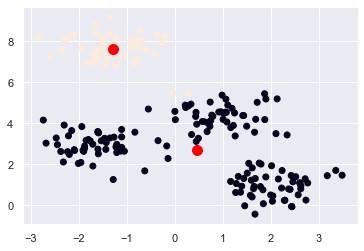

In [31]:
plt.scatter(X[:,0],X[:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red")

In [32]:
seed = 0
elbow = dict() # create a dictionary (key, value)
for k in range(1,8):
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(d)
    inertia = estimator.inertia_
    elbow[k] = inertia

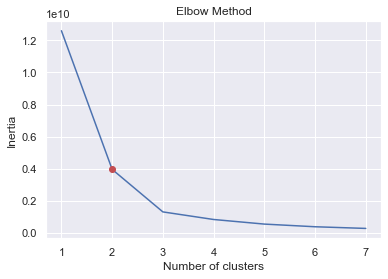

In [33]:
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(2,elbow_df[2],'ro')

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7192669476778727
For n_clusters = 3 The average silhouette_score is : 0.6678195482830437
For n_clusters = 4 The average silhouette_score is : 0.6028097450521842
For n_clusters = 5 The average silhouette_score is : 0.6070755035883816
For n_clusters = 6 The average silhouette_score is : 0.5979409714435695
For n_clusters = 7 The average silhouette_score is : 0.5673561766136991
For n_clusters = 8 The average silhouette_score is : 0.5590511498994761
For n_clusters = 9 The average silhouette_score is : 0.5509105536125756
For n_clusters = 10 The average silhouette_score is : 0.5555378343239037


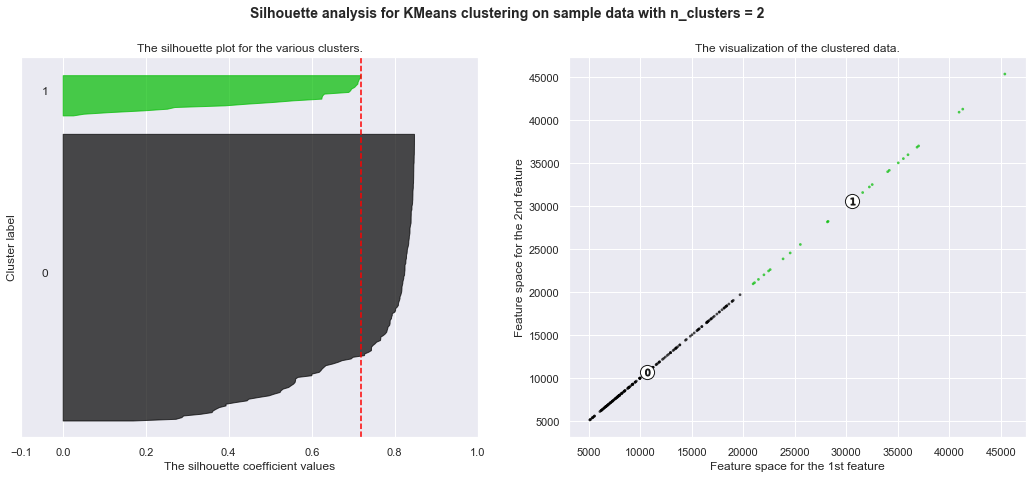

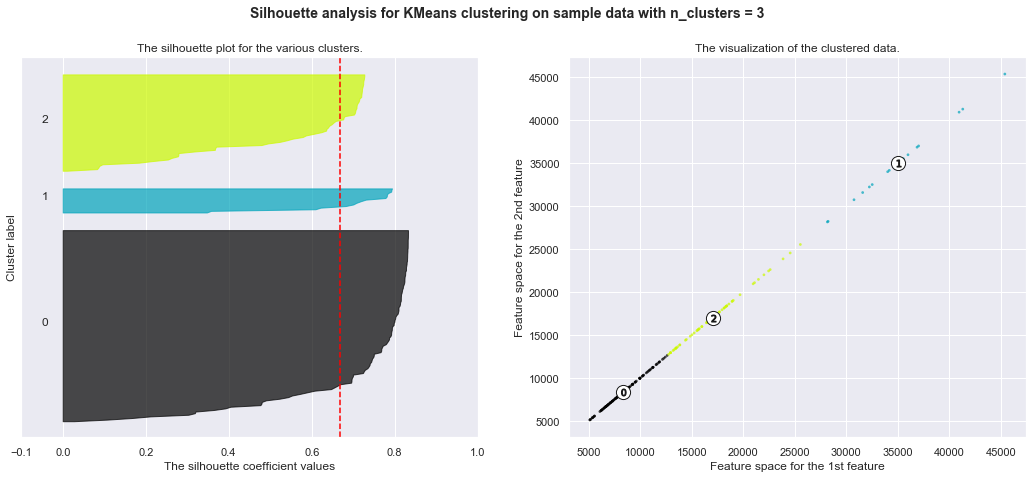

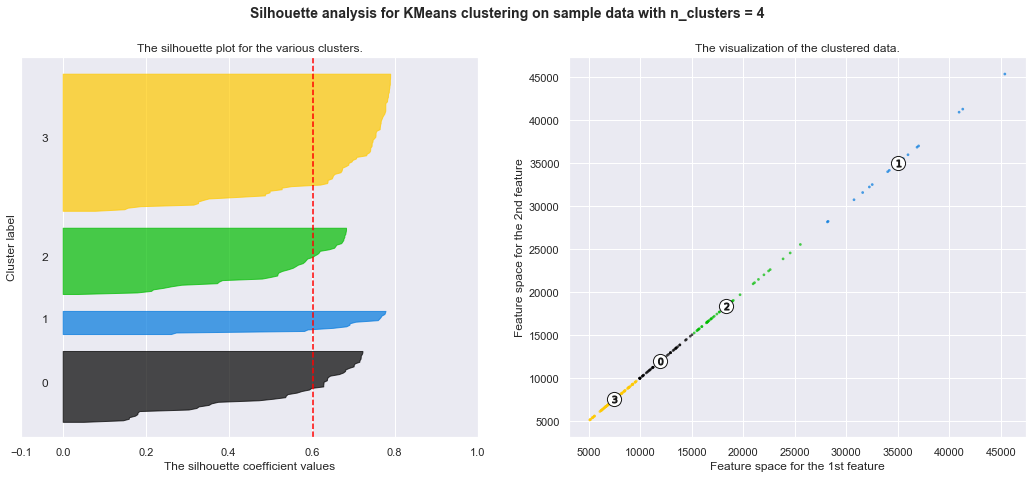

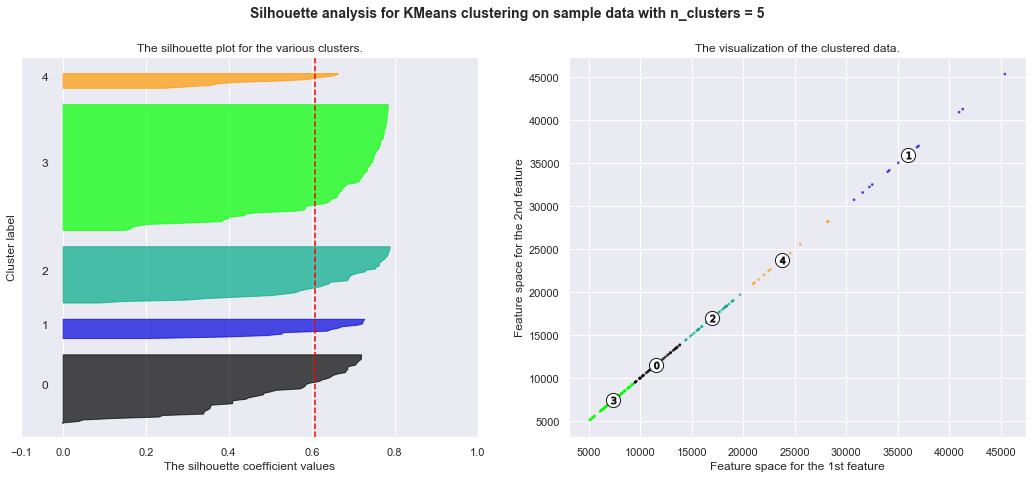

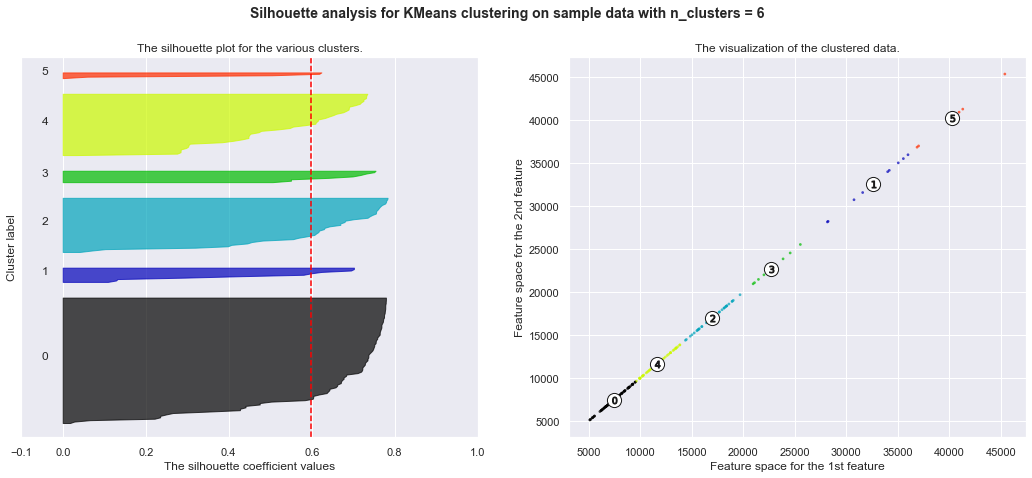

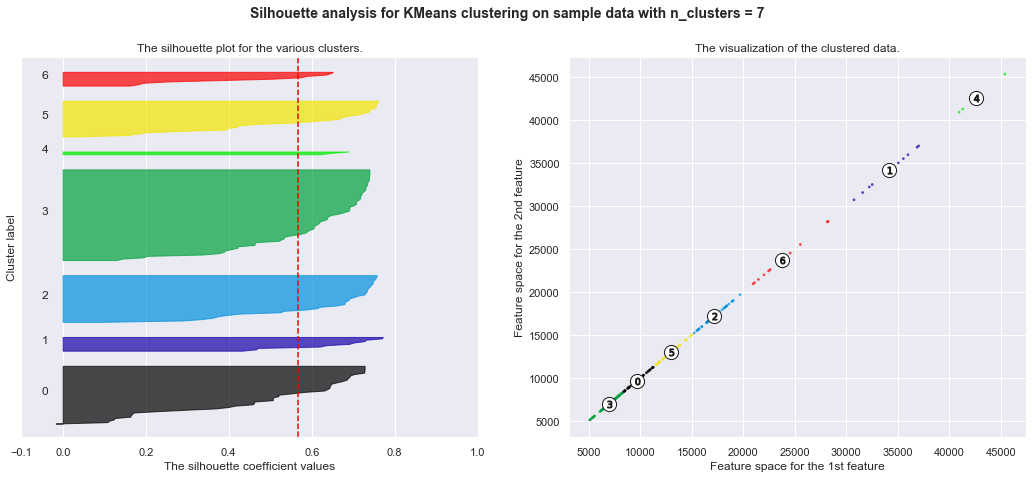

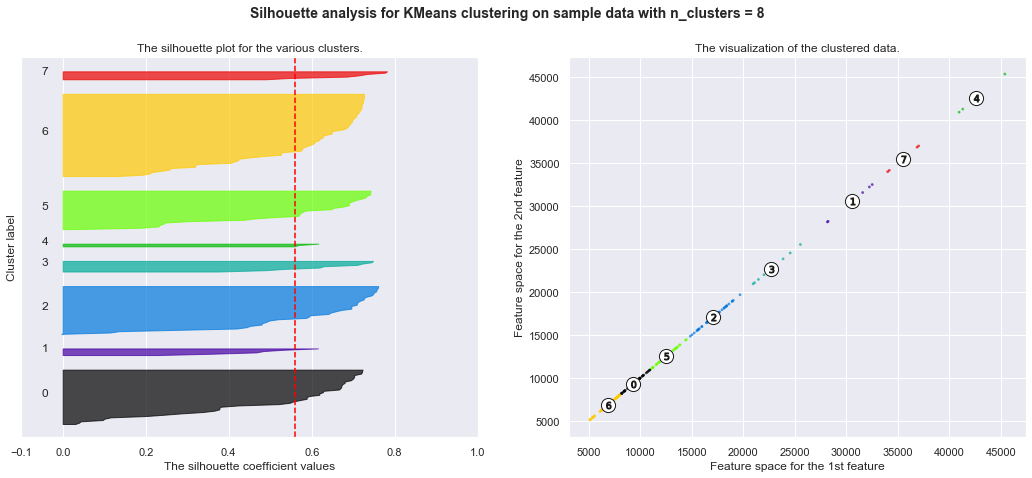

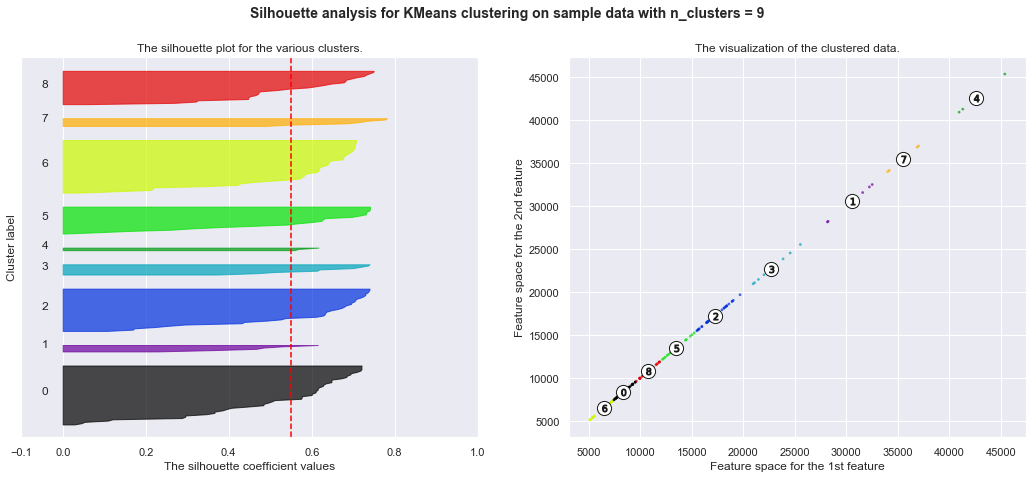

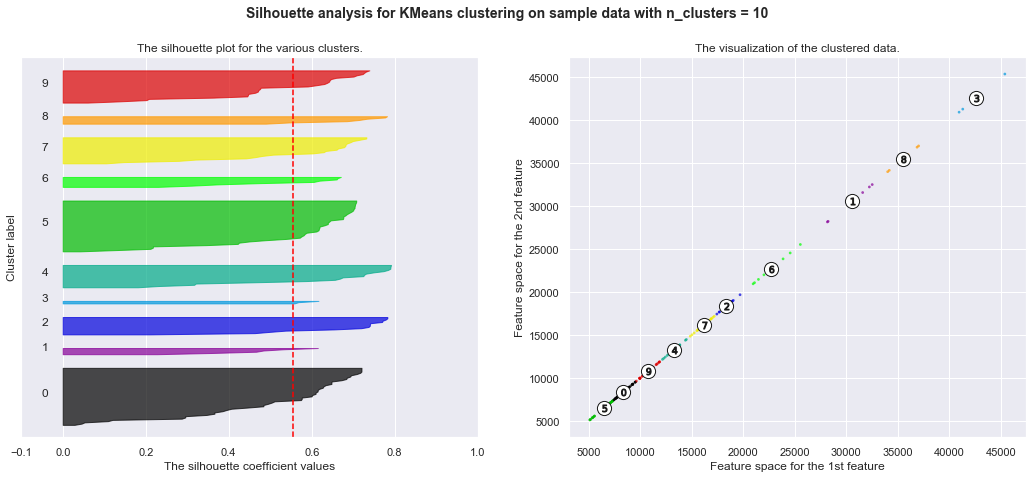

In [35]:
# Silhouette Score Method
seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(d[:, 0], d[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

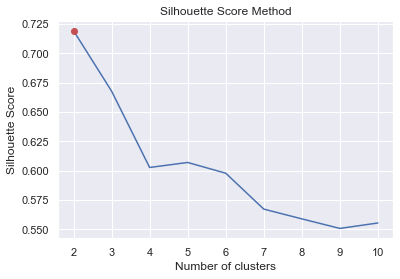

In [36]:
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(2,silhouette_df[2],'ro')

From the figure above, we can see that when the number of cluster is 2, average silhouette score is maximized. Also, the elbow method shows the number of cluster 2 is proper.

Thus we choose the number of cluster which is k to be 2.


## Problem d

In [37]:
df2 = pd.DataFrame(data2)

In [38]:
df2['Length'] = np.where(df['length']<=df['length'].mean(),'Short','Long')

In [39]:
df2['Width'] = np.where(df['width']<=df['width'].mean(),'Short','Long')

In [40]:
df2['Height'] = np.where(df['height']<=df['height'].mean(),'Low','High')

In [41]:
df2['Horsepower'] = np.where(df['horsepower']<=df['horsepower'].mean(),'Low','High')

In [42]:
df2['City-mpg'] = np.where(df['city-mpg']<=df['city-mpg'].mean(),'Bad','Good')

In [43]:
df2['Highway-mpg'] = np.where(df['highway-mpg']<=df['highway-mpg'].mean(),'Bad','Good')

In [44]:
df2

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price,Price,category,Length,Width,Height,Horsepower,City-mpg,Highway-mpg
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.0,high,1,Short,Short,Low,High,Bad,Bad
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.0,high,1,Short,Short,Low,High,Bad,Bad
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.0,high,1,Long,Long,High,High,Bad,Bad
5,audi,gas,177.3,66.3,53.1,110.0,19,25,15250.0,high,1,Long,Long,Low,High,Bad,Bad
6,audi,gas,192.7,71.4,55.7,110.0,19,25,17710.0,high,1,Long,Long,High,High,Bad,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114.0,23,28,16845.0,high,1,Long,Long,High,High,Bad,Bad
201,volvo,gas,188.8,68.8,55.5,160.0,19,25,19045.0,high,1,Long,Long,High,High,Bad,Bad
202,volvo,gas,188.8,68.9,55.5,134.0,18,23,21485.0,high,1,Long,Long,High,High,Bad,Bad
203,volvo,diesel,188.8,68.9,55.5,106.0,26,27,22470.0,high,1,Long,Long,High,High,Good,Bad


In [45]:
df2.describe()

,length,width,height,horsepower,city-mpg,highway-mpg,price,category
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,174.153807,65.882741,53.780203,103.147208,25.238579,30.710660,13223.314721,0.365482
std,12.431849,2.121442,2.457239,37.570528,6.468837,6.875907,8015.753389,0.482792
min,141.100000,60.300000,47.800000,48.000000,13.000000,16.000000,5118.000000,0.000000
25%,166.300000,64.100000,52.000000,70.000000,19.000000,25.000000,7775.000000,0.000000
50%,173.200000,65.500000,54.100000,95.000000,25.000000,30.000000,10295.000000,0.000000
75%,183.500000,66.900000,55.600000,116.000000,30.000000,34.000000,16503.000000,1.000000
max,208.100000,72.000000,59.800000,262.000000,49.000000,54.000000,45400.000000,1.000000


In [46]:
df2.head()

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price,Price,category,Length,Width,Height,Horsepower,City-mpg,Highway-mpg
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.0,high,1,Short,Short,Low,High,Bad,Bad
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.0,high,1,Short,Short,Low,High,Bad,Bad
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.0,high,1,Long,Long,High,High,Bad,Bad
5,audi,gas,177.3,66.3,53.1,110.0,19,25,15250.0,high,1,Long,Long,Low,High,Bad,Bad
6,audi,gas,192.7,71.4,55.7,110.0,19,25,17710.0,high,1,Long,Long,High,High,Bad,Bad


In [47]:
df2.dtypes

make            object
fuel-type       object
length         float64
width          float64
height         float64
horsepower     float64
city-mpg         int64
highway-mpg      int64
price          float64
Price           object
category         int64
Length          object
Width           object
Height          object
Horsepower      object
City-mpg        object
Highway-mpg     object
dtype: object

In [48]:
data = df2[['Price', 'Length', 'Width', 'Height', 'Horsepower', 'City-mpg', 'Highway-mpg']]

In [49]:
data.head()

,Price,Length,Width,Height,Horsepower,City-mpg,Highway-mpg
0,high,Short,Short,Low,High,Bad,Bad
1,high,Short,Short,Low,High,Bad,Bad
4,high,Long,Long,High,High,Bad,Bad
5,high,Long,Long,Low,High,Bad,Bad
6,high,Long,Long,High,High,Bad,Bad


In [50]:
ndata = data.values.tolist()

In [51]:
te = TransactionEncoder()
te_ary = te.fit(ndata).transform(ndata)


In [52]:
df3 = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df3, min_support=0.1, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.553299,(Bad)
1,0.492386,(Good)
2,0.705584,(High)
3,0.492386,(Long)
4,0.776650,(Low)
...,...,...
78,0.131980,"(high, Low, Long, High)"
79,0.131980,"(Low, Long, low, High)"
80,0.253807,"(Short, Low, low, High)"
81,0.111675,"(high, Long, Low, Bad, High)"


In [53]:
df3

,Bad,Good,High,Long,Low,Short,high,low
0,True,False,True,False,True,True,True,False
1,True,False,True,False,True,True,True,False
2,True,False,True,True,False,False,True,False
3,True,False,True,True,True,False,True,False
4,True,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...
192,True,False,True,True,False,False,True,False
193,True,False,True,True,False,False,True,False
194,True,False,True,True,False,False,True,False
195,True,True,True,True,False,False,True,False


In [54]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [55]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold = 1)

In [56]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [65]:
rules[rules['consequents'] == {'high'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Bad),(high),0.553299,0.365482,0.345178,0.623853,1.706932,0.142957,1.686889
15,(High),(high),0.705584,0.365482,0.360406,0.510791,1.397582,0.102528,1.297029
17,(Long),(high),0.492386,0.365482,0.329949,0.670103,1.833477,0.149991,1.923382
35,"(Bad, High)",(high),0.477157,0.365482,0.340102,0.712766,1.950207,0.165709,2.209062
48,"(Bad, Long)",(high),0.401015,0.365482,0.309645,0.772152,2.112693,0.163081,2.784828
56,"(Bad, Low)",(high),0.329949,0.365482,0.147208,0.446154,1.220726,0.026618,1.145657
104,"(Long, High)",(high),0.477157,0.365482,0.329949,0.691489,1.891992,0.155557,2.056713
127,"(Long, Low)",(high),0.279188,0.365482,0.131980,0.472727,1.293434,0.029942,1.203396
159,"(Bad, Long, High)",(high),0.395939,0.365482,0.309645,0.782051,2.139779,0.164936,2.911317
179,"(Bad, High, Low)",(high),0.253807,0.365482,0.142132,0.560000,1.532222,0.049370,1.442086


The above data show the antecedent that affect the high price.

(Bad) antecedents support turned out to be the highest.

## Problem A

In [67]:
import statsmodels.formula.api as smf

In [68]:
data3 = pd.read_csv('data/imports-85-01.csv')

In [69]:
data3['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [70]:
d2= data3.select_dtypes(include=np.number)

In [71]:
d2

,length,width,height,city-mpg,highway-mpg
0,168.8,64.1,48.8,21,27
1,168.8,64.1,48.8,21,27
2,171.2,65.5,52.4,19,26
3,176.6,66.2,54.3,24,30
4,176.6,66.4,54.3,18,22
...,...,...,...,...,...
200,188.8,68.9,55.5,23,28
201,188.8,68.8,55.5,19,25
202,188.8,68.9,55.5,18,23
203,188.8,68.9,55.5,26,27


In [73]:
df

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price,Price,category
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.0,high,1
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.0,high,1
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.0,high,1
5,audi,gas,177.3,66.3,53.1,110.0,19,25,15250.0,high,1
6,audi,gas,192.7,71.4,55.7,110.0,19,25,17710.0,high,1
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114.0,23,28,16845.0,high,1
201,volvo,gas,188.8,68.8,55.5,160.0,19,25,19045.0,high,1
202,volvo,gas,188.8,68.9,55.5,134.0,18,23,21485.0,high,1
203,volvo,diesel,188.8,68.9,55.5,106.0,26,27,22470.0,high,1


In [90]:
df = df.rename(columns = {'city-mpg':'citympg'})

In [91]:
df = df.rename(columns = {'highway-mpg':'highwaympg'})

In [76]:
# create a fitted model with all three features
lm = smf.ols(formula='price ~ horsepower+citympg+highwaympg', data=df).fit()

# print the coefficients
lm.params

Intercept     2199.818210
horsepower     159.472003
citympg        599.070038
highwaympg    -668.994795
dtype: float64

In [93]:
lm = smf.ols(formula='price ~ horsepower + citympg', data=df).fit()
lm.rsquared

0.660606002872282

In [94]:
lm = smf.ols(formula='price ~ horsepower + highwaympg', data=df).fit()
lm.rsquared

0.6667029298905541

In [95]:
lm = smf.ols(formula='price ~ horsepower + highwaympg + citympg', data=df).fit()
lm.rsquared

0.6781914373960348

In [96]:
lm = smf.ols(formula='price ~ horsepower : citympg * highwaympg', data=df).fit()
lm.rsquared

0.5953513966316974

In [97]:
lm = smf.ols(formula='price ~ citympg : horsepower * highwaympg', data=df).fit()
lm.rsquared

0.5953513966316974

In [98]:
lm = smf.ols(formula='price ~ highwaympg : horsepower * citympg', data=df).fit()
lm.rsquared

0.5552243515241692

In [92]:
lm = smf.ols(formula='price ~ highwaympg * horsepower * citympg', data=df).fit()
lm.rsquared
lm.params

Intercept                        4714.279905
highwaympg                       -144.478968
horsepower                        401.775141
highwaympg:horsepower             -10.519372
citympg                           257.028889
highwaympg:citympg                 -3.807972
horsepower:citympg                 -9.245208
highwaympg:horsepower:citympg       0.294644
dtype: float64

A multi-recursion analysis was performed using highway, horsepower, citympg variables to determine which variables affect the price.
The larger the rsquard value, the better. It's the highest when 'price ~ highwaympg * horsepower * citympg'.

For a given amount of Radio and Newspaper ad spending, an increase of 100 in highway-mpg is associated with an decrease in price of 14447.89 widgets.

## Problem B

In [115]:
#a번에 # define X and y X_oos = oos[feature_cols] y_oos = oos.price

In [130]:
df5 = pd.DataFrame(data1)
df5 = df5.drop(['make'],axis=1)
df5 = df5.drop(['fuel-type'],axis=1)

In [152]:
b=df5[df5['price'].isnull()]
b

,length,width,height,horsepower,city-mpg,highway-mpg,price
2,171.2,65.5,52.4,154.0,19,26,NaN
3,176.6,66.2,54.3,102.0,24,30,NaN
9,178.2,67.9,52.0,160.0,16,22,NaN
44,155.9,63.6,52.0,70.0,38,43,NaN
45,155.9,63.6,52.0,70.0,38,43,NaN
129,175.7,72.3,50.5,288.0,17,28,NaN


In [179]:
df6=df5.dropna()

In [253]:
# select feature columns (every column except for the 0th column)
feature_cols = df6.columns[0:5]

# define X (features) and y (response)
X = df6[feature_cols]
y = df6.price

In [254]:
df6[feature_cols]

,length,width,height,horsepower,city-mpg
0,168.8,64.1,48.8,111.0,21
1,168.8,64.1,48.8,111.0,21
4,176.6,66.4,54.3,115.0,18
5,177.3,66.3,53.1,110.0,19
6,192.7,71.4,55.7,110.0,19
...,...,...,...,...,...
200,188.8,68.9,55.5,114.0,23
201,188.8,68.8,55.5,160.0,19
202,188.8,68.9,55.5,134.0,18
203,188.8,68.9,55.5,106.0,26


In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #0.7 - 0.3

In [256]:
print(X_train)
print(y_train)

     length  width  height  horsepower  city-mpg
74    199.2   72.0    55.4       184.0        14
99    173.4   65.2    54.7        97.0        27
36    157.1   63.9    58.3        76.0        30
185   171.7   65.5    55.7        85.0        27
163   168.7   64.0    52.6        70.0        29
..      ...    ...     ...         ...       ...
141   172.0   65.4    52.5        82.0        32
145   172.0   65.4    54.3       111.0        24
77    157.3   64.4    50.8        68.0        31
148   173.6   65.4    54.9        82.0        23
40    175.4   62.5    54.1        86.0        27

[147 rows x 5 columns]
74     45400.0
99      8949.0
36      7295.0
185     8195.0
163     8058.0
        ...   
141     7126.0
145    11259.0
77      6189.0
148     8013.0
40     10295.0
Name: price, Length: 147, dtype: float64


In [257]:
print(X_test)
print(y_test)

     length  width  height  horsepower  city-mpg
38    167.5   65.2    53.3        86.0        27
31    144.6   63.9    50.8        76.0        31
124   173.2   66.3    50.2       145.0        19
180   187.8   66.5    54.1       156.0        20
100   173.4   65.2    54.7        97.0        27
32    150.0   64.0    52.6        60.0        38
43    170.7   61.8    53.5        78.0        24
21    157.3   63.8    50.8        68.0        37
174   175.6   66.5    54.9        73.0        30
94    165.3   63.8    54.5        69.0        31
155   169.7   63.6    59.1        62.0        27
14    189.0   66.9    55.7       121.0        20
112   186.7   68.4    56.7        95.0        28
135   186.6   66.5    56.1       110.0        21
34    150.0   64.0    52.6        76.0        30
113   198.9   68.4    56.7        95.0        19
49    191.7   70.6    47.8       262.0        13
58    169.0   65.7    49.6       135.0        16
19    155.9   63.6    52.0        70.0        38
89    165.3   63.8  

In [258]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [259]:
# the remaining 4 random data for testing
# make predictions
preds1 = treereg.predict(X_test)

# print predictions and actual values
print(preds1)
print(y_test)

[ 7895.    6529.   13737.75 15750.    8949.    5348.    7898.    6689.75
  8948.    6999.    7898.   21485.   15575.   13020.    6529.   12440.
 45400.   30760.    6575.    6999.    9988.    5348.    8148.    8845.
 18399.    7609.   11694.    9879.    6095.    6689.75  7995.   18920.
 15998.   15998.   16630.    7053.   33278.    9370.   15998.   17075.
 12295.   33278.   41315.   13845.    6689.75  9370.   18344.   14399.
  9879.    7799.  ]
38      9095.0
31      6855.0
124    12764.0
180    15690.0
100     9549.0
32      5399.0
43      6785.0
21      5572.0
174    10698.0
94      7299.0
155     8778.0
14     24565.0
112    16900.0
135    15510.0
34      7129.0
113    16695.0
49     36000.0
58     15645.0
19      6295.0
89      5499.0
177    11248.0
30      6479.0
146     7463.0
61     10595.0
104    17199.0
121     6692.0
41     12945.0
171    11549.0
52      6795.0
118     5572.0
182     7775.0
6      17710.0
178    16558.0
199    18950.0
107    11900.0
189    11595.0
125    22018

In [265]:
# print RMSE (Root Mean Squared Error)
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds1))

3731.141264412271

In [266]:
X_oos = b[feature_cols]
y_oos = b.price

In [269]:
# make predictions on out-of-sample data
preds1 = treereg.predict(X_oos)

# print predictions 
print(preds1)

[13737.75 17450.   34184.    6575.    6575.   23875.  ]


I select the relevant values (70:30) to make training data and testing data.

We can predict the missing price value as 13737.75, 34184, 6575, 6575, 23875.